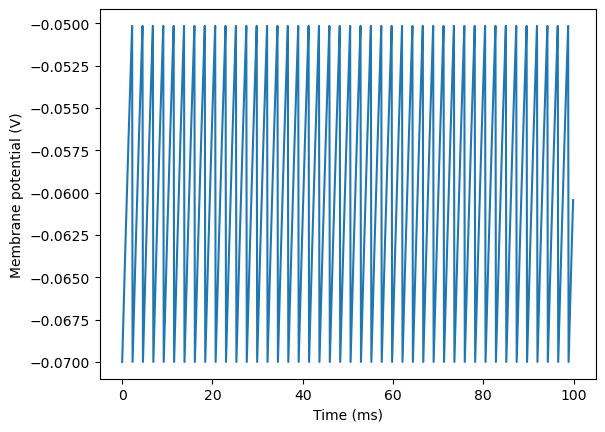

In [2]:
from brian2 import *

# Model parameters
tau = 10*ms
V0 = -70*mV  # Specify the unit for V0
Vr = -70*mV
theta = -50*mV
R = 100*Mohm
I_ext = 1*nA

# Define the differential equation for the membrane potential
eqs = '''
dV/dt = (-(V - Vr) + R*I_ext) / tau : volt
'''

# Set up the neuron group
neuron = NeuronGroup(1, eqs, threshold='V>theta', reset='V=V0', method='euler')

# Initialize the membrane potential
neuron.V = V0

# Record membrane potential
mon = StateMonitor(neuron, 'V', record=True)

# Run the simulation
run(100*ms)

# Plot results
plot(mon.t/ms, mon.V[0])
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
show()


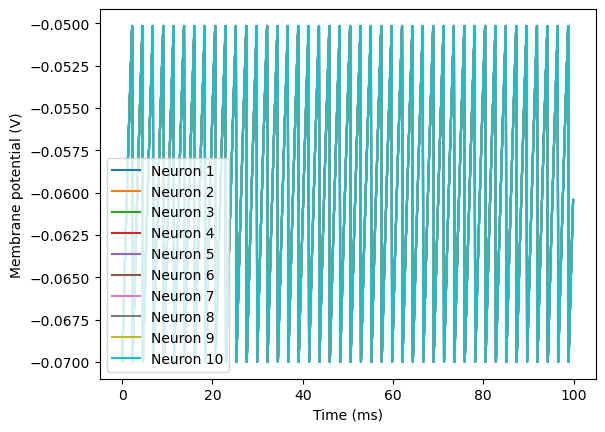

In [4]:
from brian2 import *

# Model parameters
N = 10  # Number of neurons
tau = 10*ms
V0 = -70*mV
Vr = -70*mV
theta = -50*mV
R = 100*Mohm
I_ext = 1*nA

# Define the differential equation for the membrane potential
eqs = '''
dV/dt = (-(V - Vr) + R*I_ext) / tau : volt
'''

# Set up the neuron group
neurons = NeuronGroup(N, eqs, threshold='V>theta', reset='V=V0', method='euler')

# Initialize the membrane potential
neurons.V = V0

# Record membrane potential
mon = StateMonitor(neurons, 'V', record=True)

# Create a network object and add the neuron group and monitor to it
net = Network(neurons, mon)

# Run the simulation within the network
net.run(100*ms)

# Plot results
for i in range(N):
    plot(mon.t/ms, mon.V[i], label=f'Neuron {i+1}')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()
show()


WARNING    'I_ext' is an internal variable of group 'neurongroup_4', but also exists in the run namespace with the value 1. * namp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I_ext' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 1. * namp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


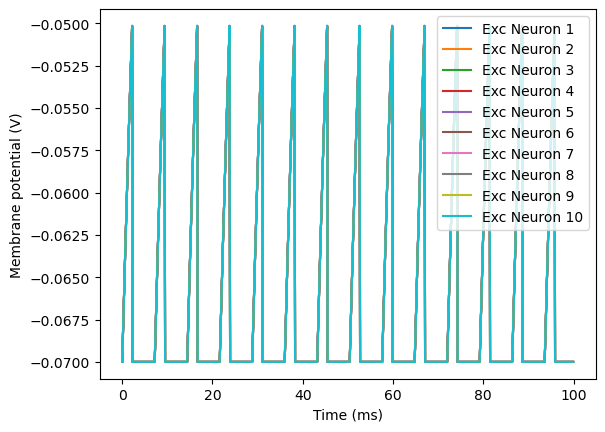

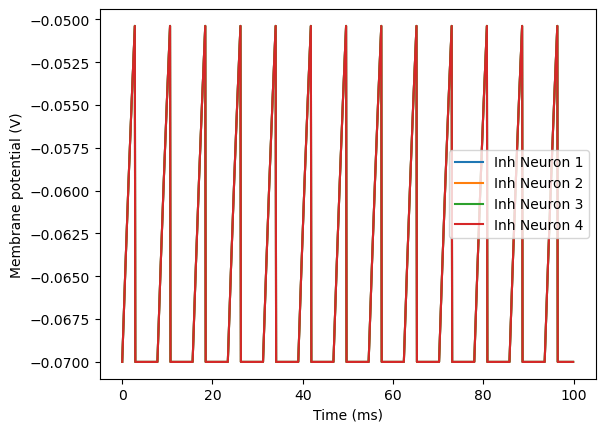

In [5]:
from brian2 import *

# Model parameters
N_exc = 10  # Number of excitatory neurons
N_inh = 4   # Number of inhibitory neurons
tau = 10*ms
V0 = -70*mV
Vr = -70*mV
theta = -50*mV
R = 100*Mohm
I_ext_exc = 1*nA  # External current for excitatory neurons
I_ext_inh = 0.8*nA  # External current for inhibitory neurons

# Define the differential equation for the membrane potential
eqs = '''
dv/dt = (-(v - Vr) + R*I_ext) / tau : volt (unless refractory)
I_ext : amp  # External current
'''

# Set up the neuron group for excitatory neurons
exc_neurons = NeuronGroup(N_exc, eqs, threshold='v>theta', reset='v=V0', refractory=5*ms, method='euler')
exc_neurons.v = V0
exc_neurons.I_ext = I_ext_exc

# Set up the neuron group for inhibitory neurons
inh_neurons = NeuronGroup(N_inh, eqs, threshold='v>theta', reset='v=V0', refractory=5*ms, method='euler')
inh_neurons.v = V0
inh_neurons.I_ext = I_ext_inh

# Record membrane potential
exc_mon = StateMonitor(exc_neurons, 'v', record=True)
inh_mon = StateMonitor(inh_neurons, 'v', record=True)

# Create a network object and add the neuron groups and monitors to it
net = Network(exc_neurons, inh_neurons, exc_mon, inh_mon)

# Run the simulation within the network
net.run(100*ms)

# Plot results
figure()
for i in range(N_exc):
    plot(exc_mon.t/ms, exc_mon.v[i], label=f'Exc Neuron {i+1}')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()

figure()
for i in range(N_inh):
    plot(inh_mon.t/ms, inh_mon.v[i], label=f'Inh Neuron {i+1}')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()

show()


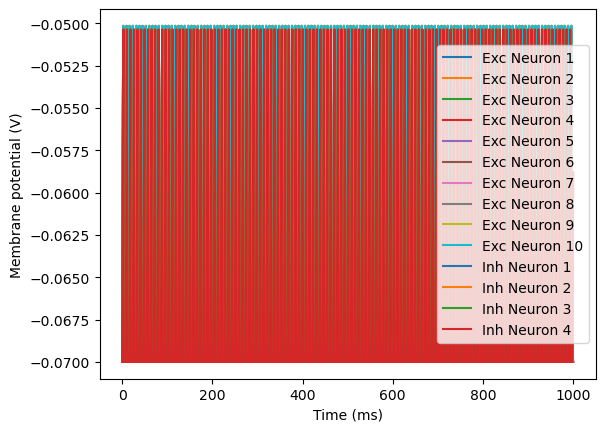

In [8]:
from brian2 import *

# Model parameters
N_exc = 10  # Number of excitatory neurons
N_inh = 4   # Number of inhibitory neurons
tau = 10*ms
V0 = -70*mV
Vr = -70*mV
theta = -50*mV
R = 100*Mohm
I_ext_exc = 1*nA  # External current for excitatory neurons
I_ext_inh = 0.8*nA  # External current for inhibitory neurons

# Define the differential equation for the membrane potential
eqs = '''
dv/dt = (-(v - Vr) + R*I_ext) / tau : volt (unless refractory)
I_ext : amp  # External current
'''

# Set up the neuron group for excitatory neurons
exc_neurons = NeuronGroup(N_exc, eqs, threshold='v>theta', reset='v=V0', refractory=5*ms, method='euler')
exc_neurons.v = V0
exc_neurons.I_ext = I_ext_exc

# Set up the neuron group for inhibitory neurons
inh_neurons = NeuronGroup(N_inh, eqs, threshold='v>theta', reset='v=V0', refractory=5*ms, method='euler')
inh_neurons.v = V0
inh_neurons.I_ext = I_ext_inh

# Record membrane potential
exc_mon = StateMonitor(exc_neurons, 'v', record=True)
inh_mon = StateMonitor(inh_neurons, 'v', record=True)

# Create a network object and add the neuron groups and monitors to it
net = Network(exc_neurons, inh_neurons, exc_mon, inh_mon)

# Run the simulation within the network
net.run(1000*ms)

# Plot results
figure()
for i in range(N_exc):
    plot(exc_mon.t/ms, exc_mon.v[i], label=f'Exc Neuron {i+1}')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()


for i in range(N_inh):
    plot(inh_mon.t/ms, inh_mon.v[i], label=f'Inh Neuron {i+1}')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()

show()


WARNING    'I_ext' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 1. * namp. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


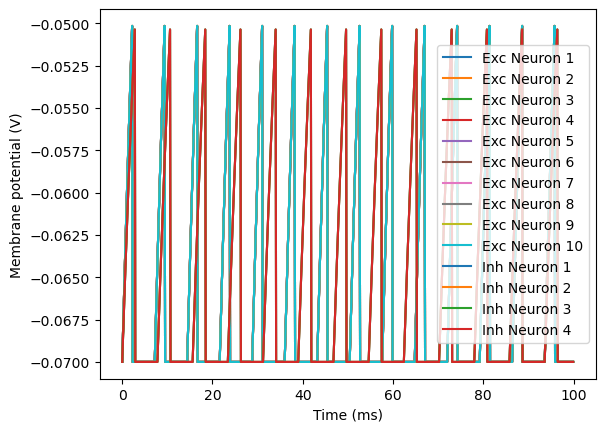

In [16]:
from brian2 import *

# Model parameters
N_exc = 10  # Number of excitatory neurons
N_inh = 4   # Number of inhibitory neurons
tau = 10*ms
V0 = -70*mV
Vr = -70*mV
theta = -50*mV
R = 100*Mohm
I_ext_exc = 1*nA  # External current for excitatory neurons
I_ext_inh = 0.8*nA  # External current for inhibitory neurons

# Define the differential equation for the membrane potential
eqs = '''
dv/dt = (-(v - Vr) + R*I_ext) / tau : volt (unless refractory)
I_ext : amp  # External current
'''

# Set up the neuron group for excitatory neurons
exc_neurons = NeuronGroup(N_exc, eqs, threshold='v>theta', reset='v=V0', refractory=5*ms, method='euler')
exc_neurons.v = V0
exc_neurons.I_ext = I_ext_exc

# Set up the neuron group for inhibitory neurons
inh_neurons = NeuronGroup(N_inh, eqs, threshold='v>theta', reset='v=V0', refractory=5*ms, method='euler')
inh_neurons.v = V0
inh_neurons.I_ext = I_ext_inh

# Record membrane potential
exc_mon = StateMonitor(exc_neurons, 'v', record=True)
inh_mon = StateMonitor(inh_neurons, 'v', record=True)

# Create a network object and add the neuron groups and monitors to it
net = Network(exc_neurons, inh_neurons, exc_mon, inh_mon)

# Run the simulation within the network
net.run(100*ms)

# Plot results
figure()

for i in range(N_exc):
    plot(exc_mon.t/ms, exc_mon.v[i], label=f'Exc Neuron {i+1}')
for i in range(N_inh):
    plot(inh_mon.t/ms, inh_mon.v[i], label=f'Inh Neuron {i+1}')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()

show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


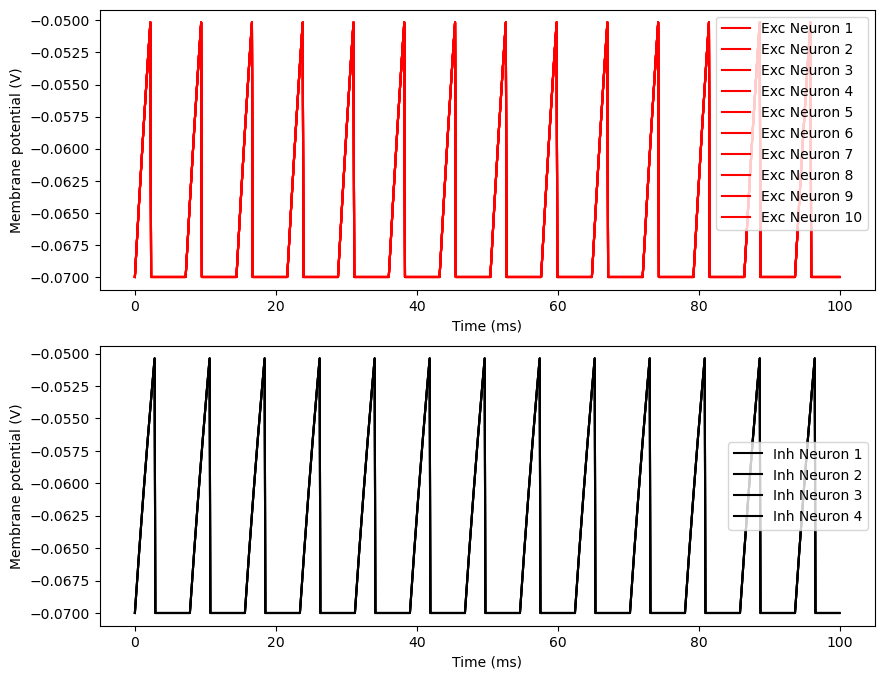

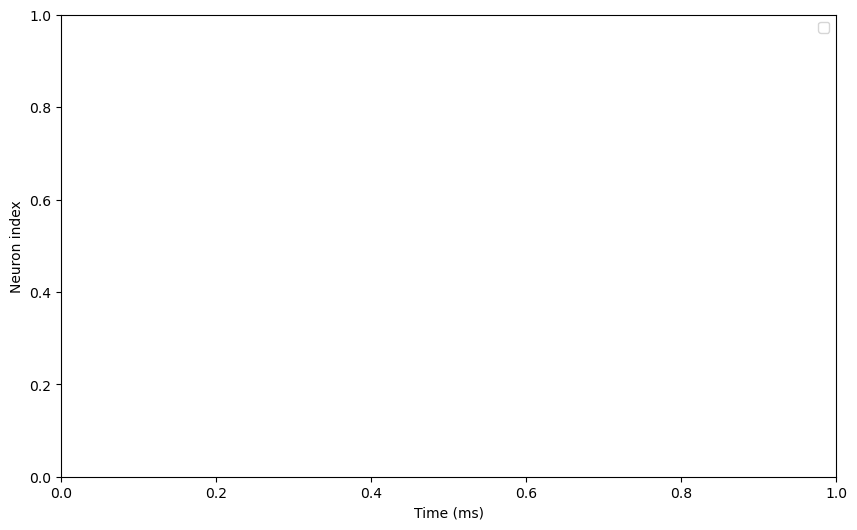

In [19]:
# Plot results
figure(figsize=(10, 8))

# Membrane potential plots
subplot(2, 1, 1)
for i in range(N_exc):
    plot(exc_mon.t/ms, exc_mon.v[i], label=f'Exc Neuron {i+1}', color='r')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()

subplot(2, 1, 2)
for i in range(N_inh):
    plot(inh_mon.t/ms, inh_mon.v[i], label=f'Inh Neuron {i+1}', color='k')
xlabel('Time (ms)')
ylabel('Membrane potential (V)')
legend()

# Plot order of spiking neurons
figure(figsize=(10, 6))
for i in range(N_exc):
    spike_indices = where(exc_mon.v[i] > theta)[0]
    spike_times = exc_mon.t[spike_indices]
    if len(spike_times) > 0:
        plot(spike_times/ms, i*np.ones_like(spike_times), '.r', label=f'Exc Neuron {i+1}')
for i in range(N_inh):
    spike_indices = where(inh_mon.v[i] > theta)[0]
    spike_times = inh_mon.t[spike_indices]
    if len(spike_times) > 0:
        plot(spike_times/ms, (N_exc + i)*np.ones_like(spike_times), '.k', label=f'Inh Neuron {i+1}')
xlabel('Time (ms)')
ylabel('Neuron index')
legend()
show()

